# **Introduction Data Preparation and Model Building**

Have a look at the steps that are followed in this notebook:
1. Load the Given Data
2. Exploratory Data Analysis
    - Explore the Data Distribution of each variable and also identify outliers.
    - Explore the Relationships between each pair of Inputs and Output. 
3. Segregate the Inputs and Output
4. Split the data into Training and Testing Data
5. **Data Preparation -** Apply data preparation on the `Training Data`
6. **Model Building -** Build the Model on Processed Train Data
7. **Data Preparation -** Apply data preparation on the `Testing Data`
8. **Prediction on Test Data -** Use the trained model to predict on test data
9. **Evaluation -** Calculate the score of model by matching model's prediction with actual values

## **Step 1 - Load the Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/Iris.csv')

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## **Step 2 - Exploratory Data Analysis**

The main reason to analyse the data here is to:
- Explore the Data Distribution of each variable and also identify outliers. (i.e. Univariate)
- Explore the Relationships between each pair of Inputs and Output. (i.e. Bivariate)

### **2.a. Explore the Data Distribution of each Variable**

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

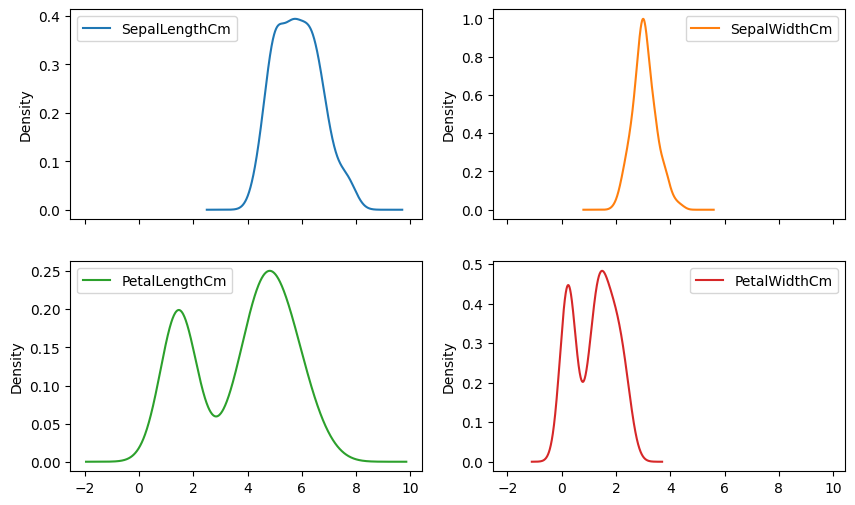

In [3]:
df.plot(kind='kde', subplots=True, layout=(2, 2), figsize=(10, 6))

### **2.b. Identifying Outliers in each Variable**

SepalLengthCm       Axes(0.125,0.53;0.352273x0.35)
SepalWidthCm     Axes(0.547727,0.53;0.352273x0.35)
PetalLengthCm       Axes(0.125,0.11;0.352273x0.35)
PetalWidthCm     Axes(0.547727,0.11;0.352273x0.35)
dtype: object

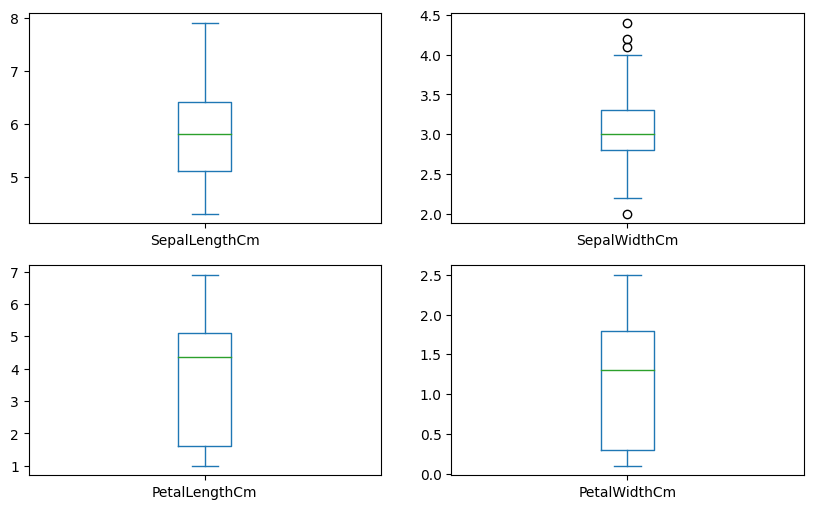

In [4]:
df.plot(kind='box', subplots=True, layout=(2, 2), figsize=(10, 6))

### **2.c. Explore the Relationships between each pair of Inputs and Output**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: title={'center': 'SepalLengthCm'}, xlabel='Species'>

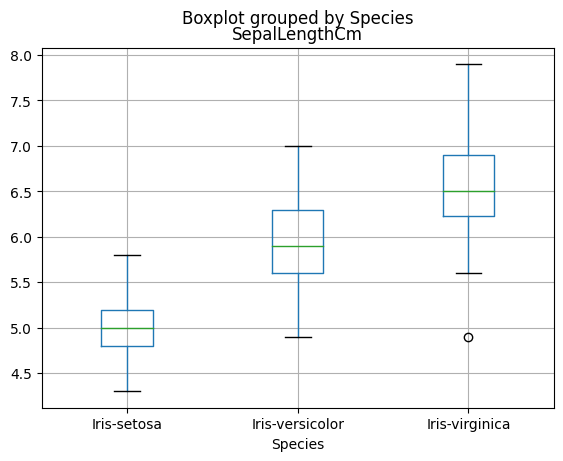

In [6]:
df.boxplot(by='Species', column='SepalLengthCm')

<Axes: title={'center': 'SepalWidthCm'}, xlabel='Species'>

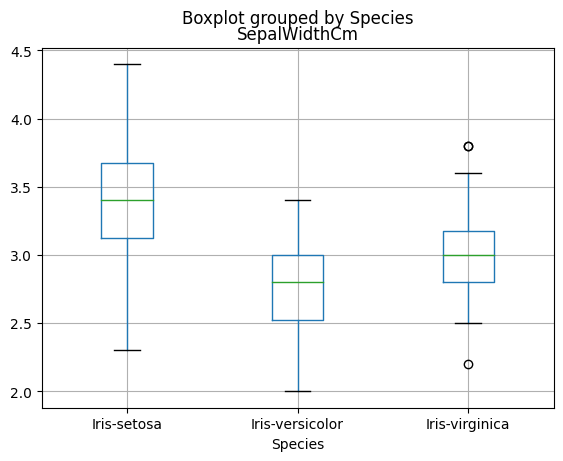

In [7]:
df.boxplot(by='Species', column='SepalWidthCm')

<Axes: title={'center': 'PetalLengthCm'}, xlabel='Species'>

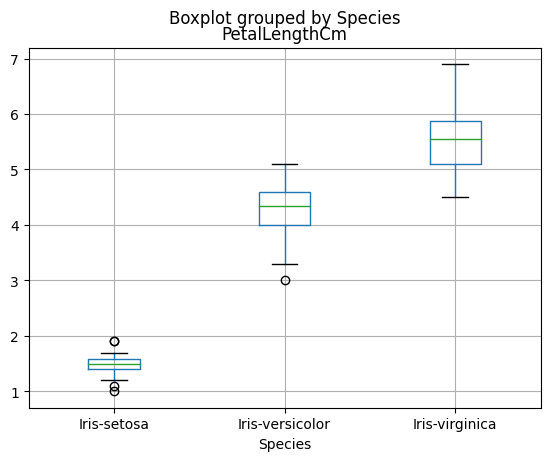

In [8]:
df.boxplot(by='Species', column='PetalLengthCm')

<Axes: title={'center': 'PetalWidthCm'}, xlabel='Species'>

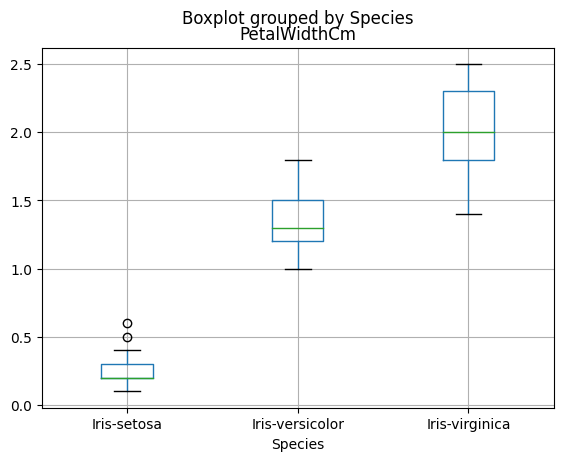

In [9]:
df.boxplot(by='Species', column='PetalWidthCm')

<b>Important Observation:</b>

- It looks like various Species are widely separated based on SepalLengthCm, PetalLengthCm and PetalWidthCm individually.
- Species have some overlaps based on SepalWidthCm.

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


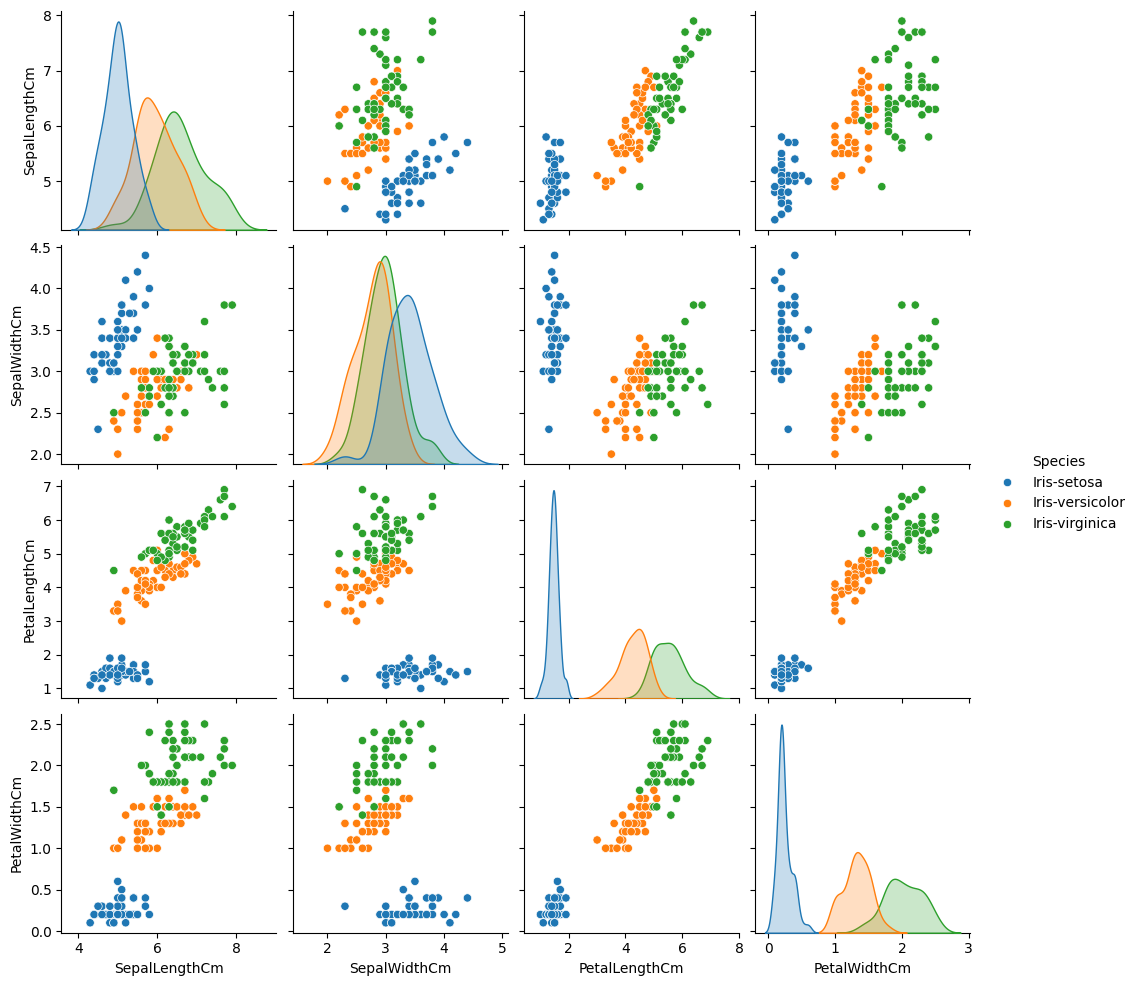

In [10]:
sns.pairplot(data=df, hue='Species')

<b>Important Observation:</b>

It looks like I don't have to consider all 4 variables to build my model. I can consider either one of the following pair:
1. PetalLength and SepalLength
2. PetalLength and SepalWidth
3. PetalLength and PetalWidth
4. PetalWidth and SepalLength


## **Data Preparation and Model Building Pipeline**

1. Segregate the Inputs (X) and Output (y)
2. Split into train and test (X_train, X_test, y_train, y_test)
3. Data Preparation: Data Cleaning and Feature Engineering.
    - Clean the training data
    - Preprocess the training data (X_train_transformed)
4. Training Phase: Build a model
5. Preprocess the test data (X_test_transformed)
6. Predict on unseen data
7. Evaluate the model performance

## **Step 3 - Segregate Inputs (X) and Output (y)**

In [11]:
y = df['Species']

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [12]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [13]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## **Step 4 - Split the data into Train and Test**

In [14]:
# Split into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(112, 4) (112,)
(38, 4) (38,)


## **Step 5 - Apply Data Preparation on Training Data**

#### **Cleaning (Discussed Later)**
- Outliers
- Missing Values
- Duplicates
- Multicollinearity

#### **Transformation (AKA Feature Engineering)**
**For Numerical Data:** When the numerical values of different features span in significantly different ranges or scales, it can impact the performance of certain machine learning algorithms. Some algorithms are sensitive to the scale of the features because they rely on distance measures(like knn or kmeans) or gradient-based optimization(like linear regression, logistic regression, svm, etc...). In such cases, **normalization** or **standardization** is applied to bring all features to a common scale. Features with different magnitudes might have values that are orders of magnitude apart from each other. For example, consider a dataset with two features:
> Feature A (Income): Values range from `$20,000` to `$100,000`.  
> Feature B (Age): Values range from `20` to `60`.

In this case:
> Feature A has a magnitude in the tens of thousands.  
> Feature B has a magnitude in the tens.

| Normalization | Standardization | 
| :---: | :---: |
| Normalization scales the values of a feature to a specific range, usually between 0 and 1. | Standardization transforms the features to have a mean of 0 and a standard deviation of 1. |
| Algorithms that rely on distance measures, such as k-nearest neighbors or clustering algorithms, benefit from normalization. | Algorithms that assume Gaussian-distributed features, like linear regression or support vector machines, often benefit from standardization. |

**`Important Note: It's essential to fit the normalization or standardization parameters (e.g., min, max, mean, and standard deviation) on the training data and apply the same transformation to the test/validation data to maintain consistency..`**


**For Categorical Data:** In order to handle categorical variables in machine learning there are various techniques like **one-hot encoding**, **label encoding**, and **ordinal encoding**. These techniques are used to convert the non-numerical data to numerical representation so that it is easy for Machine Learning algorithms to process the data and extract patterns.

| One-Hot Encoding | Label Encoding |
| :---: | :---: | 
| Converts categorical variables into a binary matrix (1s and 0s).  | Assigns integer values to categories based on a specified order. |
| Applied when the categorical variable is nominal, meaning there is no inherent order among the categories. | When the categorical variable is ordinal, and you want to control the mapping of categories to integer values. |
| Suitable when the number of unique categories is moderate. | Can manageable when the number of categories is high. |
| If the original categorical variable is "Color" with categories {Red, Blue, Green}, one-hot encoding would create three binary columns: IsRed, IsBlue, IsGreen. | If the ordinal variable is "Education Level" with categories {High School, College, Master's, PhD}, and you explicitly specify the order: {High School: 1, College: 2, Master's: 3, PhD: 4}. |

**`Important Note: One-Hot Encoding and Label Encoding is demonstrated in next notebook.`**

Below Feature Engineering for numerical feature is demonstrated.

In [15]:
# Data-preprocessing of X_train: Standardizing the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_transformed = scaler.fit_transform(X_train)

print(X_train_transformed.shape)

(112, 4)


In [16]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 4
Mean of each column: [5.88660714 3.05178571 3.79642857 1.22232143]
Std of each column: [0.86741565 0.43424445 1.79264014 0.77916047]


In [17]:
# Data-preprocessing of y_train: Encoding the data

from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to convert target classes into numerical labels
label_encoder = LabelEncoder()

y_train_transformed = label_encoder.fit_transform(y_train)

In [18]:
y_train_transformed[:5]

array([1, 1, 2, 0, 2])

In [19]:
# Lets check the mapping

print(label_encoder.classes_)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [20]:
y_train.head()

61     Iris-versicolor
92     Iris-versicolor
112     Iris-virginica
2          Iris-setosa
141     Iris-virginica
Name: Species, dtype: object

## **Step 6 - Building the Model on Processed Training Data**

In [21]:
# Import the Algorithm
from sklearn.linear_model import LogisticRegression

# Create an Object
classifier = LogisticRegression()

# Train a model on training data
classifier.fit(X_train_transformed, y_train_transformed)

LogisticRegression()

## **Step 7 - Apply Data Preparation on Test Data**

In [22]:
# Apply transformation on test data 
X_test_transformed = scaler.transform(X_test)

print(X_test_transformed.shape)

(38, 4)


In [23]:
y_test_transformed = label_encoder.transform(y_test)

print(y_test_transformed.shape)

(38,)


## **Step 8 - Use the Trainied Model to Predict on Processed Test Data**

In [24]:
# Predicting on test data
y_test_pred = classifier.predict(X_test_transformed)

## **Step 9 - Evaluation of Model's Performance**

In [25]:
# Import metrics from sklearn
from sklearn import metrics

# Calculate accuracy score
metrics.accuracy_score(y_test_transformed, y_test_pred)

0.9736842105263158

## **Using KNN Classifier Algorithm**

In [26]:
# Import the Algorithm
from sklearn.neighbors import KNeighborsClassifier

# Create the object
classifier = KNeighborsClassifier()

# Training the model
classifier.fit(X_train_transformed, y_train_transformed)

# Prediction on unseen data
y_test_pred = classifier.predict(X_test_transformed)

# Evaluation
metrics.accuracy_score(y_test_transformed, y_test_pred)

0.9736842105263158

## **Using DT Classifier Algorithm**

In [27]:
# Import the Algorithm
from sklearn.tree import DecisionTreeClassifier

# Create the object
classifier = DecisionTreeClassifier()

# Training the model
classifier.fit(X_train_transformed, y_train_transformed)

# Prediction on unseen data
y_test_pred = classifier.predict(X_test_transformed)

# Evaluation
metrics.accuracy_score(y_test_transformed, y_test_pred)

0.9736842105263158

## **Using Random Forest Classifier Algorithm**

In [28]:
# Import the Algorithm
from sklearn.ensemble import RandomForestClassifier

# Create the object
classifier = RandomForestClassifier()

# Training the model
classifier.fit(X_train_transformed, y_train_transformed)

# Prediction on unseen data
y_test_pred = classifier.predict(X_test_transformed)

# Evaluation
metrics.accuracy_score(y_test_transformed, y_test_pred)

0.9736842105263158